In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [2]:
# plt.rcParams['font.family'] = 'Malgun Gothic'  # 폰트 적용 (한글 깨짐 방지)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 14                 # 폰트 크기
plt.rcParams['figure.figsize'] = (13, 8)       # figsize 를 전역으로 설정
plt.rcParams['axes.unicode_minus'] = False     # -(마이너스) 표기 가능하도록 함

# 데이터 로딩

In [3]:
data = pd.read_csv('Global YouTube Statistics2.csv')

# EDA

## 4. Residue

In [4]:
def barplot(df, x, y, ax, N):
    df = df.sort_values(by=x, ascending=False)[:N].reset_index()
    sns.barplot(df[:N], x=x, y=y, ax=ax, palette=df['color'])
    for i, patch in enumerate(ax.patches):
        ax.text(x = ax.get_xlim()[1] * .01, y = patch.get_y() + 0.5,
                s = nation.loc[i, y])
    ax.yaxis.set_visible(False)

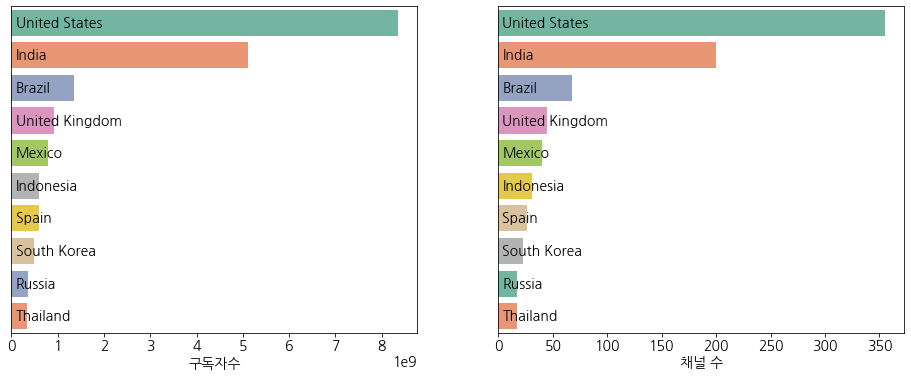

In [5]:
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

nation = data['나라'].value_counts().reset_index()
nation.columns = ['나라', '채널 수']
temp = data.groupby('나라')[['구독자수']].sum().reset_index()
nation = nation.merge(temp)
nation['color'] = list(sns.color_palette("Set2", len(nation)))

barplot(nation, y='나라', x='구독자수', ax=ax1, N=10)
barplot(nation, y='나라', x='채널 수', ax=ax2, N=10)

plt.show()

In [6]:
# 나라별 유튜버 수에 비례해서 nations를 만듬.
temp = data['나라'].value_counts() // 17
temp = temp[temp > 0].reset_index()
temp.columns = ['나라', 'count']

nations = pd.DataFrame()
for row in temp.iterrows():
    N = row[1]['count']
    nation = data[data['나라'] == row[1]['나라']]
    nations = pd.concat([nations, nation[:N]])

#### 지도

In [7]:
import geopandas as gpd
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

countries.tail(3)

C:\Users\dwook\AppData\Local\Temp/ipykernel_1188/1838142180.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\dwook\AppData\Local\Temp/ipykernel_1188/1838142180.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."
176,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ..."


In [8]:
countries['name'].unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

In [9]:
countries.loc[countries['name']=='United States of America', 'name'] = 'United States'
popularity = np.log10(data.groupby('나라')[['구독자수']].sum()).reset_index()
popularity = countries.merge(popularity, right_on='나라', left_on='name')
popularity = popularity.drop(columns=['pop_est', 'name', 'iso_a3', 'gdp_md_est'])

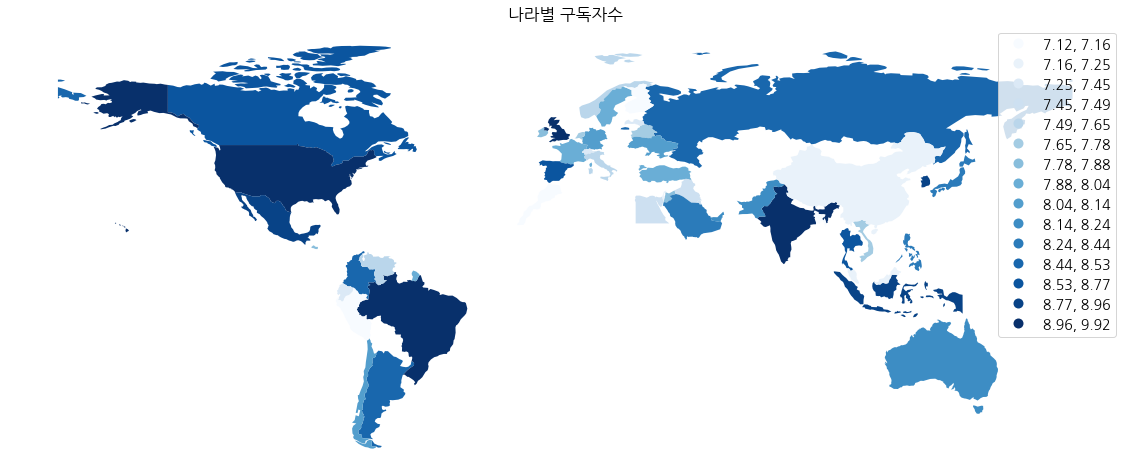

In [10]:
ax = popularity.plot(column="구독자수", legend=True, cmap='Blues',
                     scheme='quantiles', k=15,
#                      legend_kwds={"shrink": .4},
                     figsize=(20, 15))

ax.set_title("나라별 구독자수")
ax.set_axis_off()

plt.show()

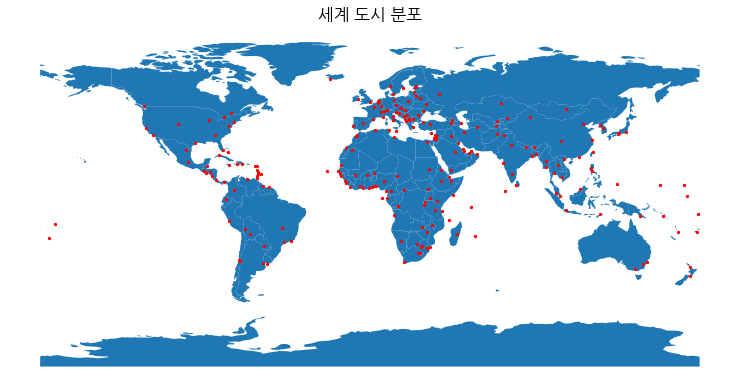

In [11]:
base = countries.plot()
ax = cities.plot(ax=base, marker='o', color='red', markersize=5)
ax.set_axis_off()
ax.set_title("세계 도시 분포")
plt.show()

#### 메모리 청소

In [12]:
import gc # garbage collector : 필요없는 메모리를 다시 가져옴.
gc.collect()

5665